# Pandas

## What is Pandas?
A Python library providing data structures and data analysis tools.

## Why
- Alternative to Excel or R
- Based on Data Frames (think of it like a table) and Series (single column table / time series)

## Learning Pandas
* Almost anything you want to do is already a built-in function in Pandas.
* Before you decide to write a function to do some kind of operation on a Pandas object, scour the Pandas docs and StackOverflow
* http://pandas.pydata.org/pandas-docs/stable/index.html

## Objectives

- Create/Understand Series objects
- Create/Understand DataFrame objects
- Create and destroy new columns, apply functions to rows and columns
- Join/Merge Dataframes
- Use DataFrame grouping and aggregation
- Perform high-level EDA using Pandas

## How to create a dataframe

In [1]:
import pandas as pd

In [2]:
a_list = [1, 2, 3, 4]

In [3]:
another_list = ['a', 'b', 'c', 'd']

In [4]:
mydict = {'col_one': a_list, 'col_two': another_list}

In [5]:
df = pd.DataFrame(mydict)

In [6]:
df.head()

,col_one,col_two
0,1,a
1,2,b
2,3,c
3,4,d


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
col_one    4 non-null int64
col_two    4 non-null object
dtypes: int64(1), object(1)
memory usage: 136.0+ bytes


## How to add or append another column to your list

In [8]:
## New data must be same length as dataframe it is going into.
moredata = ['birdman', 'drake', 'lil wayne', 'kanye']

In [9]:
df['rappers'] = moredata

In [10]:
df.head()

,col_one,col_two,rappers
0,1,a,birdman
1,2,b,drake
2,3,c,lil wayne
3,4,d,kanye


## How to fill a new column with a value.

In [11]:
df['ones'] = 1.0

In [12]:
df.head()

,col_one,col_two,rappers,ones
0,1,a,birdman,1.0
1,2,b,drake,1.0
2,3,c,lil wayne,1.0
3,4,d,kanye,1.0


## How to do math with your dataframe.

In [13]:
df['col_one']

0    1
1    2
2    3
3    4
Name: col_one, dtype: int64

In [14]:
df['ones']

0    1.0
1    1.0
2    1.0
3    1.0
Name: ones, dtype: float64

In [15]:
df['multi'] = df['col_one'] * df['ones']

In [16]:
df.head()

,col_one,col_two,rappers,ones,multi
0,1,a,birdman,1.0,1.0
1,2,b,drake,1.0,2.0
2,3,c,lil wayne,1.0,3.0
3,4,d,kanye,1.0,4.0


## How to apply a function to a column

In [17]:
df['rappers']

0      birdman
1        drake
2    lil wayne
3        kanye
Name: rappers, dtype: object

In [18]:
df['length'] = df['rappers'].apply(lambda x: len(str(x)))

In [19]:
df.head()

,col_one,col_two,rappers,ones,multi,length
0,1,a,birdman,1.0,1.0,7
1,2,b,drake,1.0,2.0,5
2,3,c,lil wayne,1.0,3.0,9
3,4,d,kanye,1.0,4.0,5


In [20]:
df['multi'] = df['multi'].astype(int)

In [21]:
df.head()

,col_one,col_two,rappers,ones,multi,length
0,1,a,birdman,1.0,1,7
1,2,b,drake,1.0,2,5
2,3,c,lil wayne,1.0,3,9
3,4,d,kanye,1.0,4,5


## How to delete or drop a COLUMN from your dataframe

In [22]:
df.drop('rappers', axis=1, inplace=True)

In [23]:
df.head()

,col_one,col_two,ones,multi,length
0,1,a,1.0,1,7
1,2,b,1.0,2,5
2,3,c,1.0,3,9
3,4,d,1.0,4,5


## How to delete or drop a ROW from your dataframe.

In [24]:
df = df.drop(1, axis=0)

In [25]:
df.head()

,col_one,col_two,ones,multi,length
0,1,a,1.0,1,7
2,3,c,1.0,3,9
3,4,d,1.0,4,5


## How to drop missing data

In [26]:
import numpy as np
a_list = [1, 2, 3, 4, np.nan]
b_list = ['birdman', 'drake', 'lil wayne', np.nan, 'kanye']
c_list = ['a', 'b', 'c', 'd', 'e']
mydict = {'col_1': a_list, 'col_2': b_list, 'col_3': c_list}
df = pd.DataFrame(mydict)
df.head()

,col_1,col_2,col_3
0,1.0,birdman,a
1,2.0,drake,b
2,3.0,lil wayne,c
3,4.0,NaN,d
4,NaN,kanye,e


In [27]:
df.dropna()

,col_1,col_2,col_3
0,1.0,birdman,a
1,2.0,drake,b
2,3.0,lil wayne,c


In [28]:
df

,col_1,col_2,col_3
0,1.0,birdman,a
1,2.0,drake,b
2,3.0,lil wayne,c
3,4.0,NaN,d
4,NaN,kanye,e


In [29]:
df.dropna(axis=0)

,col_1,col_2,col_3
0,1.0,birdman,a
1,2.0,drake,b
2,3.0,lil wayne,c


In [30]:
df.dropna(axis=1)

,col_3
0,a
1,b
2,c
3,d
4,e



## How to fill in missing data

In [31]:
a_list = [1, 2, 3, 4, np.nan]
b_list = ['birdman', 'drake', 'lil wayne', np.nan, 'kanye']
c_list = ['a', 'b', 'c', 'd', 'e']
mydict = {'col_1': a_list, 'col_2': b_list, 'col_3': c_list}
df = pd.DataFrame(mydict)
df.head()

,col_1,col_2,col_3
0,1.0,birdman,a
1,2.0,drake,b
2,3.0,lil wayne,c
3,4.0,NaN,d
4,NaN,kanye,e


In [32]:
df.fillna(0)

,col_1,col_2,col_3
0,1.0,birdman,a
1,2.0,drake,b
2,3.0,lil wayne,c
3,4.0,0,d
4,0.0,kanye,e


In [33]:
df.mean()

col_1    2.5
dtype: float64

In [34]:
df['col_2'].fillna('man')

0      birdman
1        drake
2    lil wayne
3          man
4        kanye
Name: col_2, dtype: object

In [35]:
df['col_2']

0      birdman
1        drake
2    lil wayne
3          NaN
4        kanye
Name: col_2, dtype: object

## Unique Values, Value Counts, and Conditional Selecting are so handy all the time

In [36]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [37]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [38]:
uniques = obj.unique()

In [39]:
print uniques

['c' 'a' 'd' 'b']


In [40]:
print obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64


In [41]:
mask = obj.isin(['b', 'c'])
print mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool


In [42]:
print obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object


## Group By: split-apply-combine

By "group by" we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [43]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.007119,0.339883
1,bar,one,-3.010130,1.027253
2,foo,two,-0.654142,-1.444347
3,bar,three,0.676227,0.334331
4,foo,two,1.865365,-0.215354
5,bar,two,-1.923322,-1.277153
6,foo,one,-0.263399,-0.522616
7,foo,three,-0.078936,-0.659929


In [44]:
df['A'].unique()

array(['foo', 'bar'], dtype=object)

In [45]:
df.groupby('A').sum()

,C,D
A,,
bar,-4.257225,0.084431
foo,1.876007,-2.502363


In [46]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -3.010130  1.027253
    three  0.676227  0.334331
    two   -1.923322 -1.277153
foo one    0.743720 -0.182733
    three -0.078936 -0.659929
    two    1.211223 -1.659701

## Index are your new bbf.
Indicies are just like columns, but for rows.


In [47]:
### Here is a dataframe of all the 2012 baseball hitting stats
df = pd.read_csv("data/Batting.csv")

In [48]:
df.head(5)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97889 entries, 0 to 97888
Data columns (total 24 columns):
playerID     97889 non-null object
yearID       97889 non-null int64
stint        97889 non-null int64
teamID       97889 non-null object
lgID         97152 non-null object
G            97889 non-null int64
G_batting    96483 non-null float64
AB           91476 non-null float64
R            91476 non-null float64
H            91476 non-null float64
2B           91476 non-null float64
3B           91476 non-null float64
HR           91476 non-null float64
RBI          91052 non-null float64
SB           90176 non-null float64
CS           68022 non-null float64
BB           91476 non-null float64
SO           83638 non-null float64
IBB          54912 non-null float64
HBP          88656 non-null float64
SH           85138 non-null float64
SF           55443 non-null float64
GIDP         65368 non-null float64
G_old        92700 non-null float64
dtypes: float64(18), int64(3), objec

### How to set your index

In [50]:
df['teamID'].unique()

array(['SFN', 'CHN', 'CHA', 'BOS', 'SEA', 'NYA', 'ML1', 'ATL', 'ML4',
       'CAL', 'BAL', 'NYN', 'LAN', 'OAK', 'CIN', 'HOU', 'PH3', 'BR2',
       'PHI', 'BSN', 'PIT', 'WAS', 'BRO', 'TL2', 'CLE', 'DET', 'FLO',
       'MIL', 'COL', 'SLN', 'MIN', 'KCA', 'TBA', 'KC1', 'TRO', 'PHA',
       'WS1', 'NY1', 'SLA', 'SDN', 'LAA', 'ARI', 'TOR', 'KCF', 'SR1',
       'SL4', 'TEX', 'PTF', 'RC1', 'PH2', 'BS1', 'HR1', 'CN1', 'BUF',
       'BLF', 'TRN', 'BL2', 'SE1', 'PT1', 'WSU', 'CL3', 'ML3', 'MON',
       'KCU', 'ANA', 'WS2', 'MID', 'CL2', 'KC2', 'CL4', 'BR1', 'CL1',
       'ELI', 'WS6', 'LS1', 'WS3', 'NY2', 'HAR', 'PRO', 'LS3', 'SL5',
       'WS9', 'BLN', 'BRF', 'MLA', 'IN3', 'BRP', 'CN3', 'LS2', 'PH1',
       'FW1', 'BLA', 'PH4', 'TL1', 'WS8', 'CHU', 'BLU', 'WS5', 'IN2',
       'CHF', 'PHU', 'WIL', 'CLP', 'BL3', 'SLU', 'KCN', 'CN2', 'MLU',
       'DTN', 'BFP', 'CL6', 'CHP', 'NH1', 'CNU', 'SPU', 'KEO', 'WS7',
       'RC2', 'BL1', 'SL2', 'SL3', 'SR2', 'CL5', 'NY4', 'NY3', 'PTP',
       'BR3', 'MIA',

In [51]:
# use the set_index function and pass in the name of the column you would like to set as the index
df = df.set_index('teamID')

In [52]:
df.head()

,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
teamID,,,,,,,,,,,,,,,,,,,,,
SFN,aardsda01,2004,1,NL,11,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
CHN,aardsda01,2006,1,NL,45,43.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
CHA,aardsda01,2007,1,AL,25,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
BOS,aardsda01,2008,1,AL,47,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
SEA,aardsda01,2009,1,AL,73,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### How to use your index
Now that your index is set, you can easily return items that match your request.

In [53]:
df.ix['NYA']

/home/ye/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
teamID,,,,,,,,,,,,,,,,,,,,,
NYA,aardsda01,2012,1,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NYA,abbotji01,1993,1,AL,32,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
NYA,abbotji01,1994,1,AL,24,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
NYA,ablesha01,1911,1,AL,3,3.0,4.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,3.0
NYA,abreubo01,2006,2,AL,58,58.0,209.0,37.0,69.0,16.0,...,10.0,2.0,33.0,52.0,1.0,1.0,2.0,3.0,5.0,58.0
NYA,abreubo01,2007,1,AL,158,158.0,605.0,123.0,171.0,40.0,...,25.0,8.0,84.0,115.0,0.0,3.0,0.0,7.0,11.0,158.0
NYA,abreubo01,2008,1,AL,156,156.0,609.0,100.0,180.0,39.0,...,22.0,11.0,73.0,109.0,2.0,1.0,0.0,1.0,14.0,156.0
NYA,aceveal01,2008,1,AL,6,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
NYA,aceveal01,2009,1,AL,43,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


### How to reset your index

In [54]:
df.reset_index().head(5)

,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,SFN,aardsda01,2004,1,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,CHN,aardsda01,2006,1,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,CHA,aardsda01,2007,1,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,BOS,aardsda01,2008,1,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,SEA,aardsda01,2009,1,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Filters, masks, conditional selections and all that fun stuff.


In [55]:
df = pd.read_csv('data/Batting.csv')

What if you wanted to know all the people that had....
* More than 100 at bats
* More than 50 home runs
* In the years from 1980 to 2000.

In [56]:
condition1 = df['AB'] > 100

In [57]:
condition2 = df['HR'] > 50

In [58]:
condition3 = df['yearID'] < 2000

In [59]:
condition4 =  df['yearID'] > 1980

In [60]:
filtered_df = df[ condition1 & condition2 & condition3 & condition4 ]

In [61]:
filtered_df

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
26613,fieldce01,1990,1,DET,AL,159,159.0,573.0,104.0,159.0,...,0.0,1.0,90.0,182.0,11.0,5.0,0.0,5.0,15.0,159.0
33249,griffke02,1997,1,SEA,AL,157,157.0,608.0,125.0,185.0,...,15.0,4.0,76.0,121.0,23.0,8.0,0.0,12.0,12.0,157.0
33250,griffke02,1998,1,SEA,AL,161,161.0,633.0,120.0,180.0,...,20.0,5.0,76.0,121.0,11.0,7.0,0.0,4.0,14.0,161.0
56911,mcgwima01,1996,1,OAK,AL,130,130.0,423.0,104.0,132.0,...,0.0,0.0,116.0,112.0,16.0,8.0,0.0,1.0,14.0,130.0
56914,mcgwima01,1998,1,SLN,NL,155,155.0,509.0,130.0,152.0,...,1.0,0.0,162.0,155.0,28.0,6.0,0.0,4.0,8.0,155.0
56915,mcgwima01,1999,1,SLN,NL,153,153.0,521.0,118.0,145.0,...,0.0,0.0,133.0,141.0,21.0,2.0,0.0,5.0,12.0,153.0
81928,sosasa01,1998,1,CHN,NL,159,159.0,643.0,134.0,198.0,...,18.0,9.0,73.0,171.0,14.0,1.0,0.0,5.0,20.0,159.0
81929,sosasa01,1999,1,CHN,NL,162,162.0,625.0,114.0,180.0,...,7.0,8.0,78.0,171.0,8.0,3.0,0.0,6.0,17.0,162.0


## Time-series variable
``df['date_time_object'] = pd.to_datetime(df['the date col'])`` Works 72% of the time.

In [62]:
df = pd.read_csv('data/Batting.csv')

In [63]:
df = df[['yearID', 'playerID', 'teamID']]

In [64]:
df.head()

,yearID,playerID,teamID
0,2004,aardsda01,SFN
1,2006,aardsda01,CHN
2,2007,aardsda01,CHA
3,2008,aardsda01,BOS
4,2009,aardsda01,SEA


In [65]:
pd.to_datetime(df['yearID'])

0       1970-01-01 00:00:00.000002004
1       1970-01-01 00:00:00.000002006
2       1970-01-01 00:00:00.000002007
3       1970-01-01 00:00:00.000002008
4       1970-01-01 00:00:00.000002009
5       1970-01-01 00:00:00.000002010
6       1970-01-01 00:00:00.000002012
7       1970-01-01 00:00:00.000001954
8       1970-01-01 00:00:00.000001955
9       1970-01-01 00:00:00.000001956
10      1970-01-01 00:00:00.000001957
11      1970-01-01 00:00:00.000001958
12      1970-01-01 00:00:00.000001959
13      1970-01-01 00:00:00.000001960
14      1970-01-01 00:00:00.000001961
15      1970-01-01 00:00:00.000001962
16      1970-01-01 00:00:00.000001963
17      1970-01-01 00:00:00.000001964
18      1970-01-01 00:00:00.000001965
19      1970-01-01 00:00:00.000001966
20      1970-01-01 00:00:00.000001967
21      1970-01-01 00:00:00.000001968
22      1970-01-01 00:00:00.000001969
23      1970-01-01 00:00:00.000001970
24      1970-01-01 00:00:00.000001971
25      1970-01-01 00:00:00.000001972
26      1970

In [66]:
pd.to_datetime(df['yearID'], format='%Y')

0       2004-01-01
1       2006-01-01
2       2007-01-01
3       2008-01-01
4       2009-01-01
5       2010-01-01
6       2012-01-01
7       1954-01-01
8       1955-01-01
9       1956-01-01
10      1957-01-01
11      1958-01-01
12      1959-01-01
13      1960-01-01
14      1961-01-01
15      1962-01-01
16      1963-01-01
17      1964-01-01
18      1965-01-01
19      1966-01-01
20      1967-01-01
21      1968-01-01
22      1969-01-01
23      1970-01-01
24      1971-01-01
25      1972-01-01
26      1973-01-01
27      1974-01-01
28      1975-01-01
29      1976-01-01
           ...    
97859   2013-01-01
97860   2013-01-01
97861   2013-01-01
97862   2013-01-01
97863   2013-01-01
97864   2013-01-01
97865   2013-01-01
97866   2013-01-01
97867   2013-01-01
97868   2013-01-01
97869   2013-01-01
97870   2013-01-01
97871   2013-01-01
97872   2013-01-01
97873   2013-01-01
97874   2013-01-01
97875   2013-01-01
97876   2013-01-01
97877   2013-01-01
97878   2013-01-01
97879   2013-01-01
97880   2013

In [67]:
df['dt_object'] = pd.to_datetime(df['yearID'], format='%Y')

In [68]:
df['dt_object'][0]

Timestamp('2004-01-01 00:00:00')

### Datetime index is so awesome!


In [69]:
df = df.set_index('dt_object')

In [70]:
df

,yearID,playerID,teamID
dt_object,,,
2004-01-01,2004,aardsda01,SFN
2006-01-01,2006,aardsda01,CHN
2007-01-01,2007,aardsda01,CHA
2008-01-01,2008,aardsda01,BOS
2009-01-01,2009,aardsda01,SEA
2010-01-01,2010,aardsda01,SEA
2012-01-01,2012,aardsda01,NYA
1954-01-01,1954,aaronha01,ML1
1955-01-01,1955,aaronha01,ML1


In [71]:
df.ix['2010-01-01': '2013-01-01']

/home/ye/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,yearID,playerID,teamID
dt_object,,,
2010-01-01,2010,aardsda01,SEA
2012-01-01,2012,aardsda01,NYA
2010-01-01,2010,abadfe01,HOU
2011-01-01,2011,abadfe01,HOU
2012-01-01,2012,abadfe01,HOU
2010-01-01,2010,abreubo01,LAA
2011-01-01,2011,abreubo01,LAA
2012-01-01,2012,abreubo01,LAA
2012-01-01,2012,abreubo01,LAN


### Plot time series aggregation

In [72]:
df.head()

,yearID,playerID,teamID
dt_object,,,
2004-01-01,2004,aardsda01,SFN
2006-01-01,2006,aardsda01,CHN
2007-01-01,2007,aardsda01,CHA
2008-01-01,2008,aardsda01,BOS
2009-01-01,2009,aardsda01,SEA


In [73]:
df['count']=1

In [74]:
% matplotlib inline

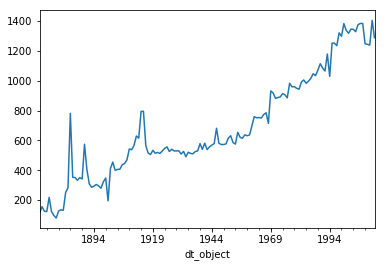

In [75]:
df['count'].resample("12M").sum().plot()

## Functions I use all the time.

<table>
<tr><td>**Pandas function**</td><td>**WHAT IT DOES**</td></tr>
<tr><td>``import pandas as pd``</td><td>imports pandas as pd</td></tr>
<tr><td>``df = pd.read_csv('path-to-file.csv')``</td><td>load data into pandas</td></tr>
<tr><td>``df.head(5)``</td><td>prints the first n lines. in this case 5 lines</td></tr>
<tr><td>``df.index``</td><td>prints the index of your dataframe </td></tr>
<tr><td>``df.columns``</td><td>prints the columns of your dataframe</td></tr>
<tr><td>``df.set_index('col')``</td><td>make the index (aka row names) the values of a column</td></tr>
<tr><td>``df.reset_index()``</td><td>reset index</td></tr>
<tr><td>``df.columns = ['new name1', 'new name2']``</td><td>rename cols</td></tr>
<tr><td>``df = df.rename(columns={'old name 1': 'new name 1', 'old2': 'new2'})``</td><td>rename specific col</td></tr>
<tr><td>``df['col']``</td><td>selects one column</td></tr>
<tr><td>``df[['col1', 'col2']]``</td><td>select more than one col</td></tr>
<tr><td>``df['col'] = 1``</td><td>set the entire col to equal 1</td></tr>
<tr><td>``df['empty col'] = np.nan``</td><td>make an empty column</td></tr>
<tr><td>``df['col3'] = df['col1'] + df['col2']``</td><td>create a new col, equal the the sum of other cols</td></tr>
<tr><td>``df.ix[0]``</td><td>select row 0</td></tr>
<tr><td>``df.ix[5:100]``</td><td>select rows 5 through 100</td></tr>
<tr><td>``df.ix[1,2,3,4]``</td><td>select rows 1,2,3 and 4</td></tr>
<tr><td>``df.ix[0]['col']``</td><td>select row and column, reterive cell value</td></tr>
<tr><td>``del df['col']``</td><td>delete or drop or remove a column</td></tr>
<tr><td>``df.drop('col', axis=1)``</td><td>delete or drop or remove a column</td></tr>
<tr><td>``df.drop('row')``</td><td>delete or drop or remove a row</td></tr>
<tr><td>``df = df.sort('col', ascending=False)``</td><td>sort data frame on this column</td></tr>
<tr><td>``df.sort(['col', 'col2'], ascending=False)``</td><td>sort data by col1, then by col2</td></tr>
<tr><td>``solo_col = df['col']``</td><td>make a variable that is equal the col</td></tr>
<tr><td>``just_values = df['col'].values``</td><td>returns an array with just the values, NO INDEX</td></tr>
<tr><td>``df[(df['col'] == 'condition') ]``</td><td>return df when col is equal to condition</td></tr>
<tr><td>``df[(df['col 1'] == 'bob') & (df['col 2'] > 75) ]``</td><td>return df when one col meets this condition AND another col meets another condition</td></tr>
<tr><td>``df['col'][(df['col1'] == 'this') & (df['col2'] > 'that')] = 'new val'``</td><td>set col1 to new value when col1 == this, and col2 == that if this then than </td></tr>
<tr><td>``df.groupby('col').sum()``</td><td>group by groupby a column and SUM all other (that can acutally be summed)</td></tr>
<tr><td>``df.plot(kind='bar')``</td><td>make a bar plot. **kind**= 'bar' or 'line' or 'scatter' or 'kde' or 'pie' or 'area'</td></tr>
<tr><td>``alist = df['cols'].values``</td><td>extract just the values of a column into a list to use somewhere else ususally</td></tr>
<tr><td>``a_matrix = df.as_matrix()``</td><td>extract just the values of a whole dataframe as a matrix; this will remove the index and the column names. I use it usually to put into a like sklearn or some other algo</td></tr>
<tr><td>``df.sort(axis=1)``</td><td>sort by column names ie; if your df columns were 'z' 'd' 'a' df.sort(axis=1) would reorder columns to be 'a' 'd' 'z</td></tr>
<tr><td>``df.sort('col', axis=0)``</td><td>will sort by the 'col' column with lowest vals at top</td></tr>
<tr><td>``df.sort('col', axis=0, ascending=True)``</td><td>will sort by the 'col' column with highest vals at top</td></tr>
<tr><td>``df.sort(['col-a', 'col-b'], axis=0) ``</td><td>sort by more than one column</td></tr>
<tr><td>``df.sort_index()``</td><td>this will sort the index, your index</td></tr>
<tr><td>``df.sort_index(by='col-a')``</td><td>this is the same thing as just doing df.sort('col-a') </td></tr>
<tr><td>``df.rank()``</td><td>it keeps your df in order, but ranks them in within their own col, for example: if your df['col'] == [99, 69] df['col'].rank == [2,1]</td></tr>
<tr><td>``df = pd.DataFrame({'col-a': alist, 'col-b': otherlist})``</td><td>how to put or how to insert a list into a data frame, how to build a dataframe</td></tr>
<tr><td>``df.dtypes``</td><td>will print out the type of value that is in each column; ie (int, or float, or object, or timestamp)</td></tr>
<tr><td>``df['float-col'].astype(np.int)``</td><td>will change columns data type. np.int stands for numpy.integer. you can do np.int, np.float, np.string_ how to change the column type</td></tr>
<tr><td>``joined = dfone.join(dftwo)``</td><td>join two dataframes if the keys are in the index</td></tr>
<tr><td>``merged = pd.merge(dfone, dftwo, on='key col')``</td><td>merge two dataframes on a similar column or a key column</td></tr>
<tr><td>``pd.concat([dfone, dftwo, series3])``</td><td>like, append data to the end of a dataframe, this will make your data frame LONGER add data to end of a df, add data below df, add data as rows</td></tr>
<tr><td>``pd.concat([dfone, dftwo, series3], axis=1)``</td><td>append data but as columns, like, this will make your data frame WIDER, (possibly longer if new data is longer than old data)</td></tr>
</table>